In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

如何留住关键员工是人力资源的一项主要任务，然而我们是否知道为什么他们离开呢？市场营销部门利用数据分析来得知客户为什么离开，那么人力资源也可以！

+ name: The last name of the employee. 
+ satisfaction_level:    Employee satisfaction level. Ranges between 0 and 1.
+ last_evaluation: The grade the employee got at their last evaluation. Ranges between 0 and 1.
+ number_projects: The number of projects the employee is currently working on.
+ average_monthly_hours: The number of monthly hours the employee is working.
+ time_spent_company: The number of years the employee has been working for the company
+ work_accident: Whether the employee has already had a work accident in the past (1 for yes, 0 for no)
+ promotion_last_5_years: Whether the employee has got promoted during (1 for yes, 0 for no)
+ department: The department the employee is working for
+ salary: The current level of salary of the employee (3 categories : high, medium, low)
+ left: Whether the employee has left. 0 if the employee is still working for the company, 1 if not.

14999条记录

### 数据导入

In [9]:
data = pd.read_csv('../data/raw_data.csv')
data.head(10)

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary,salary_level
0,SMITH,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,BROWN,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,JONES,0.37,0.52,2,159,3,0,1,0,sales,low,1
5,MILLER,0.41,0.50,2,153,3,0,1,0,sales,low,1
6,DAVIS,0.10,0.77,6,247,4,0,1,0,sales,low,1
7,GARCIA,0.92,0.85,5,259,5,0,1,0,sales,low,1
8,RODRIGUEZ,0.89,1.00,5,224,5,0,1,0,sales,low,1
9,WILSON,0.42,0.53,2,142,3,0,1,0,sales,low,1


In [10]:
data.shape

(14999, 12)

### 相关性分析

+ 满意度低，离开意愿强
+ 永远不满意的工资
+ 满意度低如果项目多，在公司工作年限长

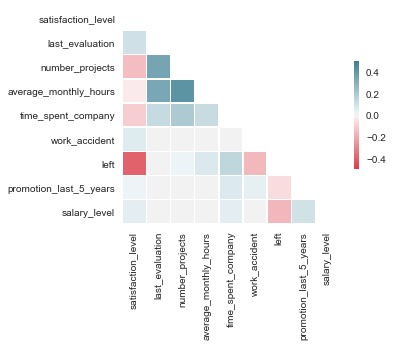

In [11]:
sns.set(style="white")

# correlation matrix
corr = data.corr()

# mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(5, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [12]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]], dtype=bool)

### 重点分析满意度

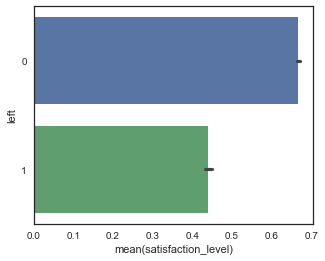

In [13]:
sns.set(style="white")
f, ax = plt.subplots(figsize=(5, 4))
sns.barplot(x=data.satisfaction_level,y=data.left,orient="h", ax=ax)

不同部门的满意度

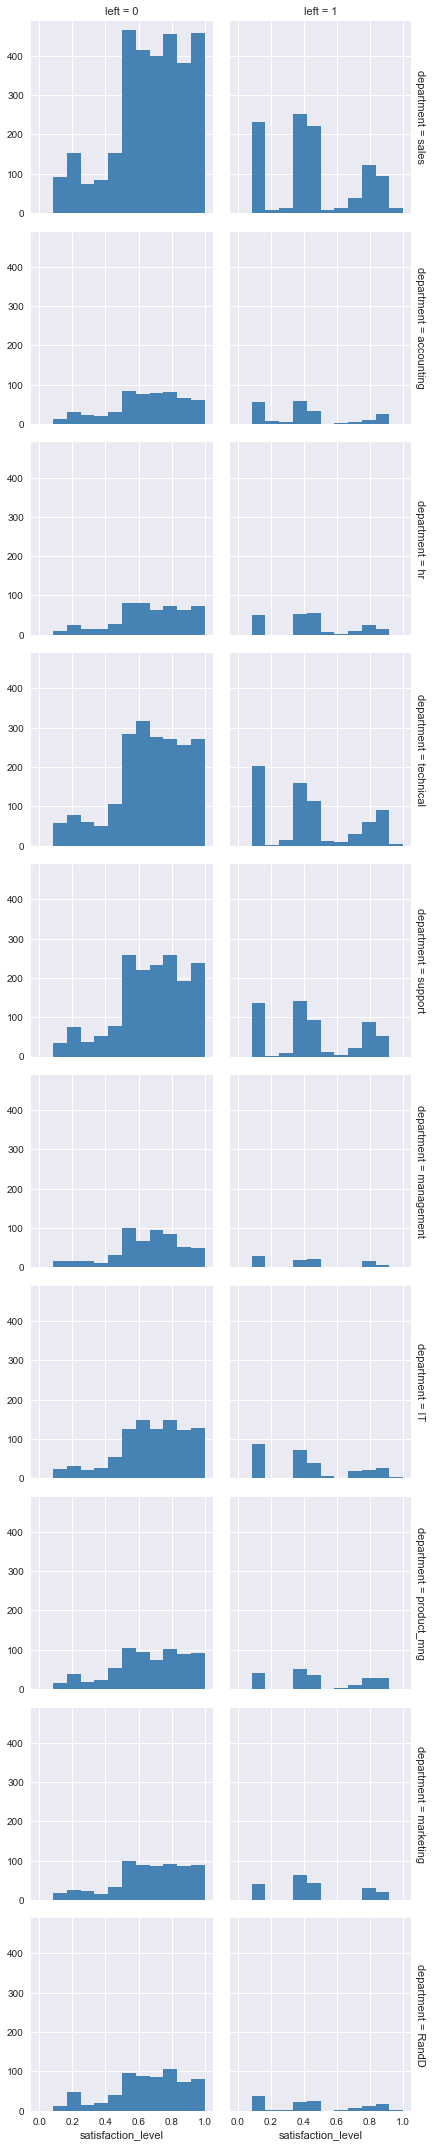

In [14]:
sns.set(style="darkgrid")
g = sns.FacetGrid(data, row="department", col="left", margin_titles=True)
bins = np.linspace(0, 1, 13)
g.map(plt.hist, "satisfaction_level", color="steelblue", bins=bins, lw=0)

有趣的是离开的人分成了3组：

+ 满意却离开
+ 不满意离开
+ 中间的

### 进一步看看离开的人

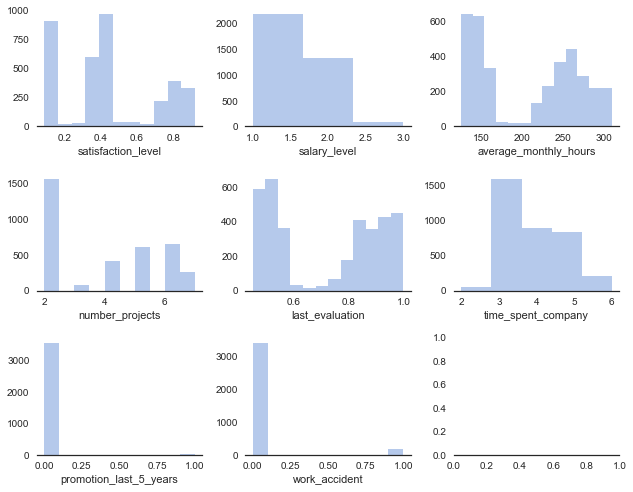

In [15]:
sns.set(style="white", palette="muted", color_codes=True)

f, axes = plt.subplots(3, 3, figsize=(9,7))
sns.despine(left=True)

#people that left
leavers = data.loc[data['left'] == 1]

sns.distplot(leavers['satisfaction_level'], kde=False, color="b", ax=axes[0,0])
sns.distplot(leavers['salary_level'], bins=3, kde=False, color="b", ax=axes[0, 1])
sns.distplot(leavers['average_monthly_hours'], kde=False, color="b", ax=axes[0, 2])
sns.distplot(leavers['number_projects'], kde=False, color="b", ax=axes[1,0])
sns.distplot(leavers['last_evaluation'], kde=False, color="b", ax=axes[1, 1])
sns.distplot(leavers['time_spent_company'], kde=False, bins=5, color="b", ax=axes[1, 2])
sns.distplot(leavers['promotion_last_5_years'],bins=10, kde=False, color="b", ax=axes[2,0])
sns.distplot(leavers['work_accident'], bins=10,kde=False, color="b", ax=axes[2, 1])


plt.tight_layout()

离开： 在公司呆的时间长，项目多，多年没有promotion，工资还低

不过有些上次绩效评估很好，在公司也呆了些年的人离开是公司的损失！

### 关键员工呢?

In [16]:
#all key employees
key_employees = data.loc[data['last_evaluation'] > 0.7].loc[data['time_spent_company'] >= 3]
key_employees.describe()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
count,6123.000000,6123.000000,6123.000000,6123.000000,6123.000000,6123.000000,6123.000000,6123.000000,6123.000000
mean,0.603059,0.864467,4.301813,219.332027,4.127225,0.138984,0.304426,0.022865,1.583374
std,0.287024,0.083265,1.215323,48.552356,1.383378,0.345958,0.460201,0.149484,0.629788
min,0.090000,0.710000,2.000000,96.000000,3.000000,0.000000,0.000000,0.000000,1.000000
25%,0.430000,0.800000,3.000000,180.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.690000,0.870000,4.000000,229.000000,4.000000,0.000000,0.000000,0.000000,2.000000
75%,0.830000,0.930000,5.000000,258.000000,5.000000,0.000000,1.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [17]:
#lost key employees
lost_key_employees = key_employees.loc[data['left']==1]
lost_key_employees.describe()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
count,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.0,1864.000000,1864.000000
mean,0.462328,0.896357,5.325107,257.935622,4.622318,0.047747,1.0,0.002146,1.409871
std,0.354372,0.067570,1.061447,30.686214,0.695091,0.213287,0.0,0.046287,0.521599
min,0.090000,0.710000,2.000000,130.000000,3.000000,0.000000,1.0,0.000000,1.000000
25%,0.100000,0.840000,5.000000,243.000000,4.000000,0.000000,1.0,0.000000,1.000000
50%,0.505000,0.900000,5.000000,258.000000,5.000000,0.000000,1.0,0.000000,1.000000
75%,0.820000,0.950000,6.000000,278.000000,5.000000,0.000000,1.0,0.000000,2.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000,3.000000


In [18]:
print("Number of key employees: ", len(key_employees))
print("Number of lost key employees: ", len(lost_key_employees))
print("Percentage of lost key employees: ", round((float(len(lost_key_employees))/float(len(key_employees))*100),2),"%")

Number of key employees:  6123
Number of lost key employees:  1864
Percentage of lost key employees:  30.44 %


In [19]:
#save key employees data as csv
key_employees.to_csv('../data/key_employees.csv')

### 为什么离开?

In [20]:
#filter out people with a good last evaluation
leaving_performers = leavers.loc[leavers['last_evaluation'] > 0.7]

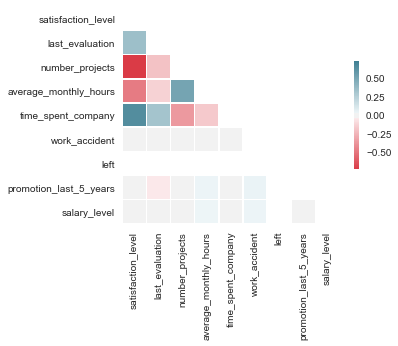

In [21]:
sns.set(style="white")

# correlation matrix
corr = leaving_performers.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(5, 4))

cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

项目多，工作时间长！

### 建立一个模型来预测

In [22]:
y = data['left']

# remove salary
to_drop = ['name', 'salary', 'left']
leave_feat_space = data.drop(to_drop,axis=1)

features = leave_feat_space.columns

In [23]:
# convert label features to integers
from sklearn import preprocessing
le_sales = preprocessing.LabelEncoder()
le_sales.fit(leave_feat_space["department"])
leave_feat_space["department"] = le_sales.transform(leave_feat_space.loc[:,('department')])

# transforme the whole feature space into a matrix
X = leave_feat_space.as_matrix().astype(np.float)

# standardize all features
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

print(X.shape)
print("Unique target labels:", np.unique(y))

(14999, 9)
Unique target labels: [0 1]


In [24]:
# prediction function
def run_cv(X,y,clf_class, method, **kwargs):
    
    from sklearn.model_selection import cross_val_predict
    
    clf = clf_class(**kwargs)
    
    predicted = cross_val_predict(clf, X, y, cv=3, method=method)
    
    return predicted

In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import metrics

def accuracy(y, predicted):   
    return metrics.accuracy_score(y, predicted)

print("Support vector machines:")
print("%.3f" % accuracy(y, run_cv(X,y,SVC, method='predict')))
print("Random forest:")
print("%.3f" % accuracy(y, run_cv(X,y,RF, method='predict')))
print("K-nearest-neighbors:")
print("%.3f" % accuracy(y, run_cv(X,y,KNN, method='predict')))

Support vector machines:
0.958
Random forest:
0.989
K-nearest-neighbors:
0.952


In [26]:
from sklearn.metrics import confusion_matrix

y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
    ( "Support Vector Machines", confusion_matrix(y,run_cv(X,y,SVC, method='predict')) ),
    ( "Random Forest", confusion_matrix(y,run_cv(X,y,RF, method='predict')) ),
    ( "K-Nearest-Neighbors", confusion_matrix(y,run_cv(X,y,KNN, method='predict')) ),
]

# confusion matrix
print(confusion_matrices)


[('Support Vector Machines', array([[11135,   293],
       [  332,  3239]])), ('Random Forest', array([[11377,    51],
       [  118,  3453]])), ('K-Nearest-Neighbors', array([[11002,   426],
       [  289,  3282]]))]


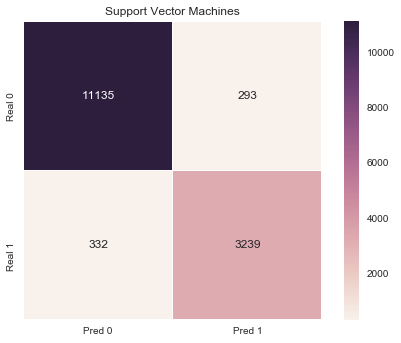

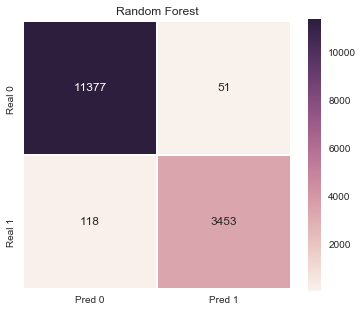

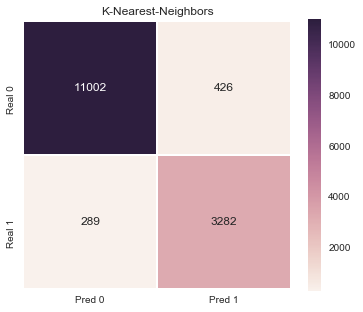

In [27]:
for cf in confusion_matrices:

    ax = plt.axes()
    ax.set_title(cf[0])
    
    df_cm = pd.DataFrame(cf[1], index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
    plt.figure(figsize = (6,5))
    sns.heatmap(df_cm, annot=True, ax = ax, square=True, fmt="d",linewidths=.5)

In [28]:
pred_prob = run_cv(X, y, RF, n_estimators=10,  method='predict_proba',)

pred_leave = pred_prob[:,1]
is_leave = y == 1

counts = pd.value_counts(pred_leave)

# calculate true probabilities
true_prob = {}
for prob in counts.index:
    true_prob[prob] = np.mean(is_leave[pred_leave == prob])
    true_prob = pd.Series(true_prob)

counts = pd.concat([counts,true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts

,pred_prob,count,true_prob
0,0.0,9398,0.004363
1,1.0,3135,0.992982
2,0.1,1362,0.016887
3,0.2,426,0.016432
4,0.3,194,0.036082
5,0.9,190,1.000000
6,0.4,78,0.230769
7,0.8,66,0.924242
8,0.7,57,0.842105
9,0.6,55,0.800000


In [29]:
pred_prob_df = pd.DataFrame(pred_prob)
pred_prob_df.columns = ['prob_not_leaving', 'prob_leaving']

#merge dataframes to get the name of employees
all_employees_pred_prob_df = pd.concat([data, pred_prob_df], axis=1)



In [30]:
#目前在公司但很可能离开的人
good_employees_still_working_df = all_employees_pred_prob_df[(all_employees_pred_prob_df["left"] == 0) & 
                                                            (all_employees_pred_prob_df["last_evaluation"] >= 0.7)]



In [31]:
good_employees_still_working_df.sort_values(by='prob_leaving', ascending=False, inplace=True)
good_employees_still_working_df

C:\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary,salary_level,prob_not_leaving,prob_leaving
11615,ROSENZWEIG,0.87,0.89,4,225,8,0,0,0,marketing,low,1,0.0,1.0
6358,BRUMBAUGH,0.81,0.98,5,243,6,0,0,0,sales,medium,2,0.0,1.0
13826,METHENY,0.87,0.89,4,225,8,0,0,0,marketing,low,1,0.0,1.0
11762,TIMOTHY,0.81,0.90,4,270,10,0,0,0,accounting,medium,2,0.0,1.0
3780,PEACE,0.86,0.96,5,238,5,0,0,0,technical,low,1,0.0,1.0
7762,MURPHEY,0.82,0.87,5,273,6,0,0,0,support,medium,2,0.0,1.0
11980,TIERNAN,0.79,0.87,4,223,5,0,0,0,sales,medium,2,0.0,1.0
10098,CHILSON,0.73,0.83,5,266,5,0,0,0,sales,low,1,0.0,1.0
6263,DEGROOT,0.90,0.87,4,231,5,0,0,0,management,low,1,0.0,1.0
2415,CHAVIS,0.92,0.97,4,238,5,1,0,0,support,medium,2,0.0,1.0
